In [33]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats

# Configure display settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


In [34]:
# Cell 2: Load and explore the dataset
# from: https://www.kaggle.com/c/titanic/data

# Load the data
df = pd.read_csv('data/titanic.csv')

# Display basic information
print("Dataset shape:", df.shape)
print("\nColumn names and types:")
print(df.dtypes)
print("\nFirst 5 rows:")
df.head()

Dataset shape: (891, 12)

Column names and types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Cell 3: Dataset overview
# Get detailed information about the dataset
print("Dataset Info:")
df.info()

print("\n" + "="*50 + "\n")

print("Statistical Summary:")
df.describe(include='all')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Statistical Summary:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


            Column  Missing_Count  Missing_Percentage
Cabin        Cabin            687           77.104377
Age            Age            177           19.865320
Embarked  Embarked              2            0.224467


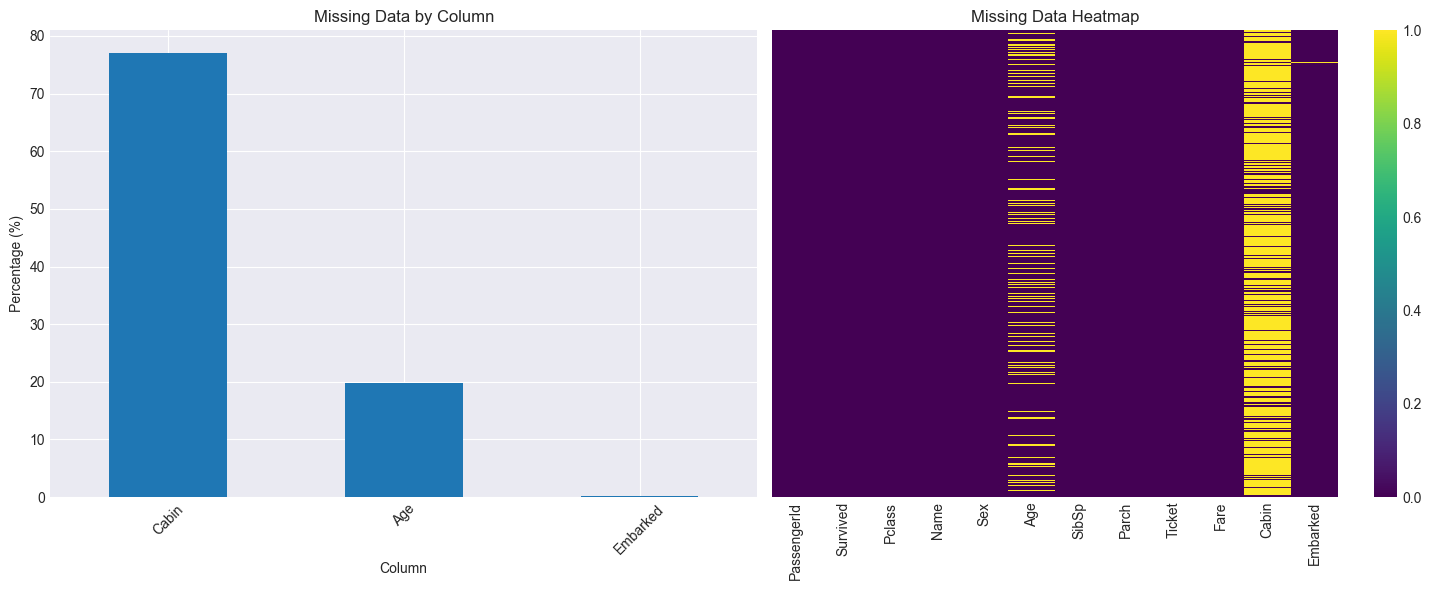

In [38]:
# Cell 4: Missing data analysis
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
# print(missing_data)

missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)
print(missing_data)

# Visualize missing data
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot of missing data
missing_data.plot(
    x='Column',
    y='Missing_Percentage',
    kind='bar',
    legend=False,
    ax=axes[0]  # <- first axe == left plot
)
axes[0].set_title('Missing Data by Column')
axes[0].set_ylabel('Percentage (%)')
axes[0].tick_params(axis='x', rotation=45)

# Heatmap of missing data
sns.heatmap(df.isnull(), 
            cbar=True, 
            yticklabels=False, 
            cmap='viridis', 
            ax=axes[1])  # <- second axe == right plot
axes[1].set_title('Missing Data Heatmap')

plt.tight_layout()
plt.show()


Survived
0    549
1    342
Name: count, dtype: int64


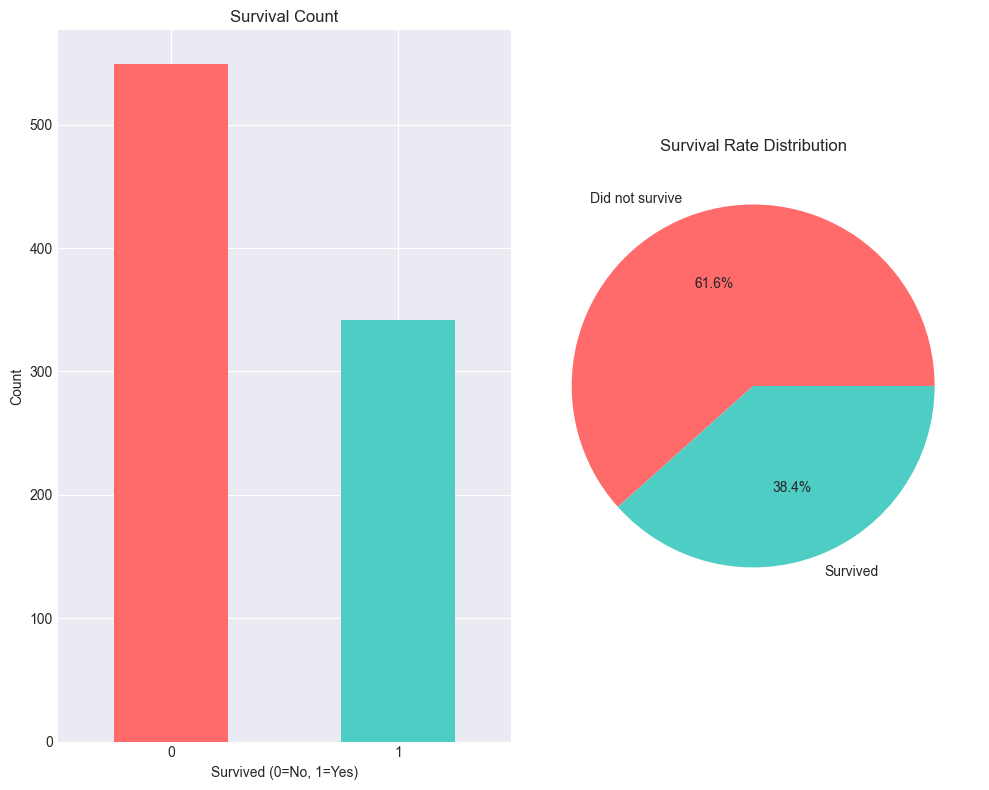

Overall survival rate: 38.38%
Total passengers: 891
Survived: 342
Did not survive: 549


In [60]:
# Cell 5: Target variable analysis - Survival rate
# Analyze survival rate
survival_counts = df['Survived'].value_counts()
# print(survival_counts)
survival_rate = df['Survived'].mean()

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
survival_counts.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('Survival Count')
plt.xlabel('Survived (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(survival_counts, labels=['Did not survive', 'Survived'], 
        autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4'])
plt.title('Survival Rate Distribution')

plt.tight_layout()
plt.show()

print(f"Overall survival rate: {survival_rate:.2%}")
print(f"Total passengers: {len(df)}")
print(f"Survived: {survival_counts[1]}")
print(f"Did not survive: {survival_counts[0]}")

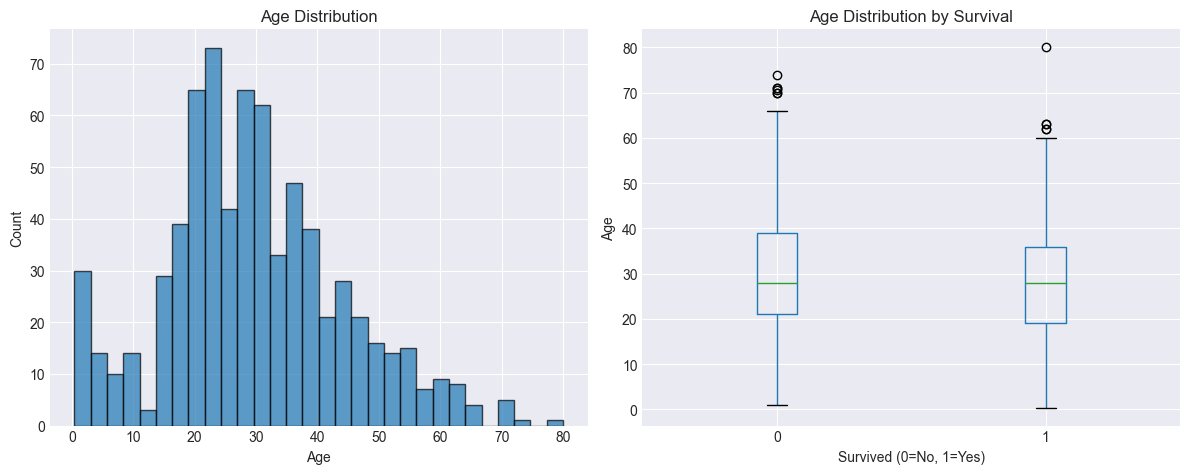

Age Statistics by Survival Status:
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


In [99]:
# Cell 6: Demographic analysis - Age distribution
# Analyze age distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['Age'].hist(bins=30, edgecolor='black', alpha=0.7, ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

df.boxplot(column='Age', by='Survived', ax=axes[1])
axes[1].set_title('Age Distribution by Survival')
axes[1].set_xlabel('Survived (0=No, 1=Yes)')
axes[1].set_ylabel('Age')

plt.tight_layout()
plt.show()

# Age statistics by survival
age_stats = df.groupby('Survived')['Age'].describe()
print("Age Statistics by Survival Status:")
print(age_stats)

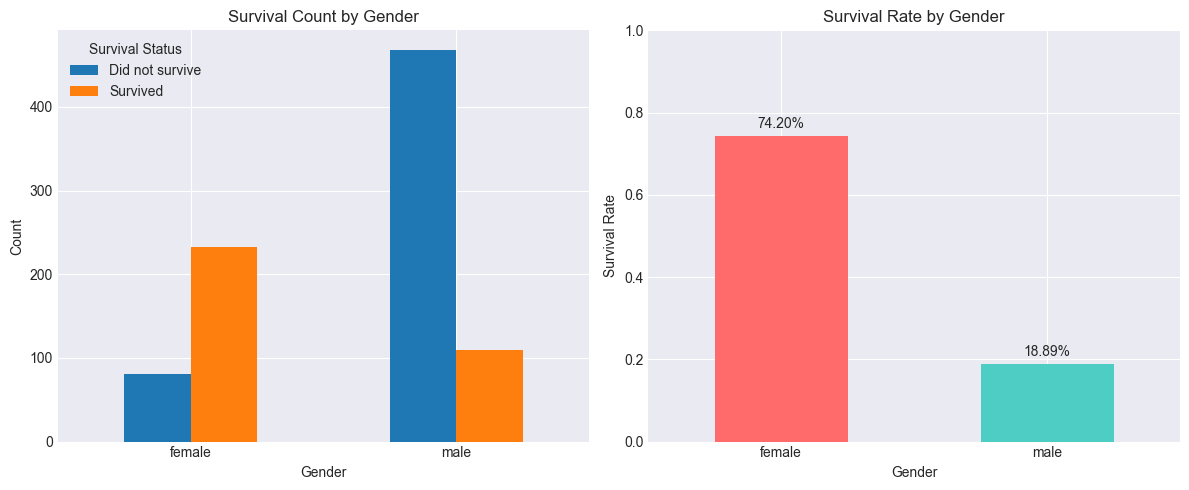

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [121]:
# Cell 7: Gender analysis
# Analyze survival by gender
gender_survival = pd.crosstab(df['Sex'], df['Survived'])
gender_survival_rate = df.groupby('Sex')['Survived'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

gender_survival.plot(kind='bar', stacked=False, ax=axes[0])
axes[0].set_title('Survival Count by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(['Did not survive', 'Survived'], title='Survival Status')

gender_survival_rate.plot(kind='bar', color=['#FF6B6B', '#4ECDC4'], ax=axes[1])
axes[1].set_title('Survival Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Survival Rate')
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylim(0, 1)

for i, v in enumerate(gender_survival_rate):
    axes[1].text(i, v + 0.02, f'{v:.2%}', ha='center')

plt.tight_layout()
plt.show()

print("Survival Rate by Gender:")
print(gender_survival_rate)

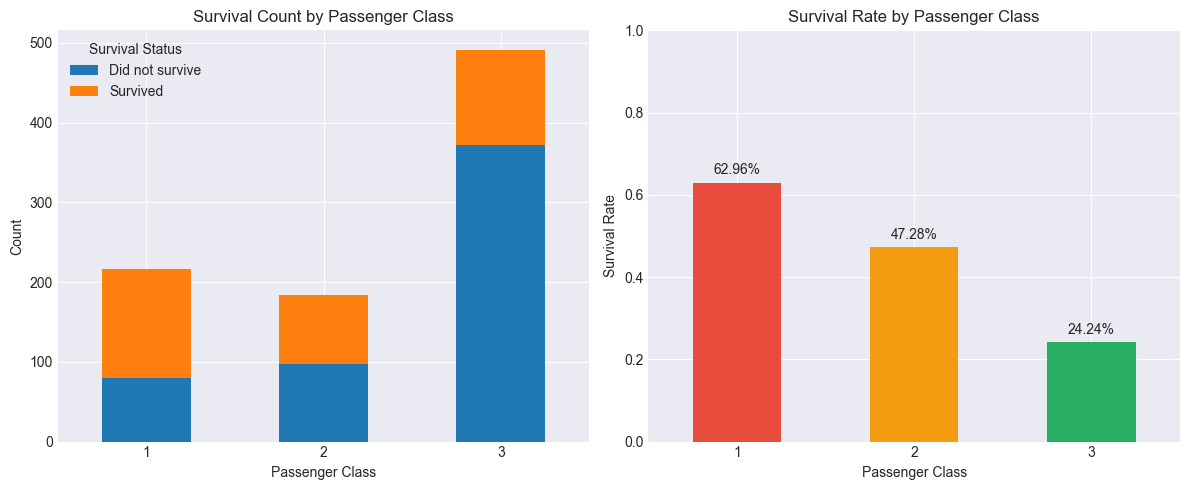

Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [127]:
# Cell 8: Passenger class analysis
# Analyze survival by passenger class
class_survival = pd.crosstab(df['Pclass'], df['Survived'])
# print(class_survival)
class_survival_rate = df.groupby('Pclass')['Survived'].mean()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

class_survival.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Survival Count by Passenger Class')
axes[0].set_xlabel('Passenger Class')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=0)
axes[0].legend(['Did not survive', 'Survived'], title='Survival Status')

class_survival_rate.plot(kind='bar', color=['#E74C3C', '#F39C12', '#27AE60'], ax=axes[1])
axes[1].set_title('Survival Rate by Passenger Class')
axes[1].set_xlabel('Passenger Class')
axes[1].set_ylabel('Survival Rate')
axes[1].tick_params(axis='x', rotation=0)
axes[1].set_ylim(0, 1)

for i, v in enumerate(class_survival_rate):
    axes[1].text(i, v + 0.02, f'{v:.2%}', ha='center')

plt.tight_layout()
plt.show()

print("Survival Rate by Passenger Class:")
print(class_survival_rate)

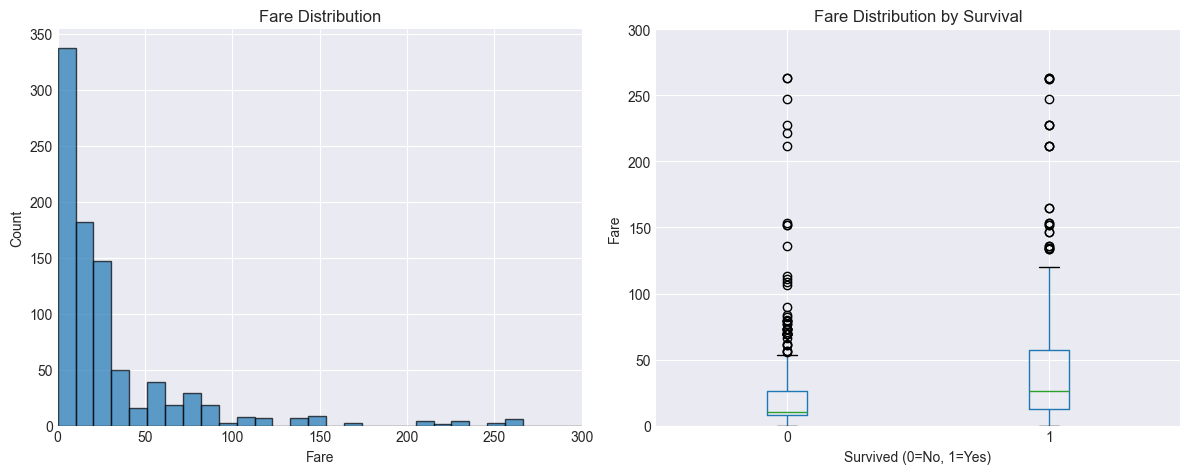

Fare Statistics by Survival Status:
          count       mean        std  min      25%   50%   75%       max
Survived                                                                 
0         549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
1         342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


In [141]:
# Cell 9: Fare analysis
# Analyze fare distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

df['Fare'].hist(bins=50, edgecolor='black', alpha=0.7, ax=axes[0])
axes[0].set_title('Fare Distribution')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Count')
axes[0].set_xlim(0, 300)  # Limit x-axis for better visualization

df.boxplot(column='Fare', by='Survived', ax=axes[1])
axes[1].set_title('Fare Distribution by Survival')
axes[1].set_xlabel('Survived (0=No, 1=Yes)')
axes[1].set_ylabel('Fare')
axes[1].set_ylim(0, 300)  # Limit y-axis for better visualization

plt.suptitle("")
plt.tight_layout()
plt.show()

# Fare statistics by survival
fare_stats = df.groupby('Survived')['Fare'].describe()
print("Fare Statistics by Survival Status:")
print(fare_stats)

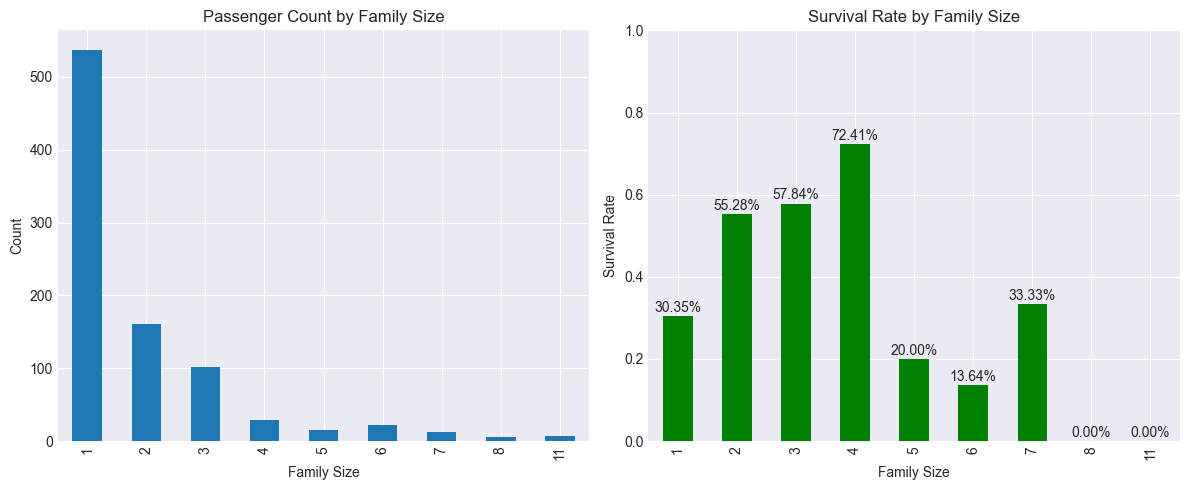

IsAlone
0    0.505650
1    0.303538
Name: Survived, dtype: float64

Survival Rate - Alone vs With Family:
Traveling alone: 30.35%
With family: 50.56%


In [162]:
# Cell 10: Family size analysis
# Create family size feature
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Analyze survival by family size
family_survival = df.groupby('FamilySize')['Survived'].agg(['mean', 'count'])

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
family_survival['count'].plot(kind='bar')
plt.title('Passenger Count by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
family_survival['mean'].plot(kind='bar', color='green')
plt.title('Survival Rate by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Survival Rate')
plt.ylim(0, 1)

for i, v in enumerate(family_survival['mean']):
    plt.text(i, v + 0.01, f'{v:.2%}', ha='center')

plt.tight_layout()
plt.show()

# Alone vs With Family
alone_survival = df.groupby('IsAlone')['Survived'].mean()
print("\nSurvival Rate - Alone vs With Family:")
print(f"Traveling alone: {alone_survival[1]:.2%}")
print(f"With family: {alone_survival[0]:.2%}")

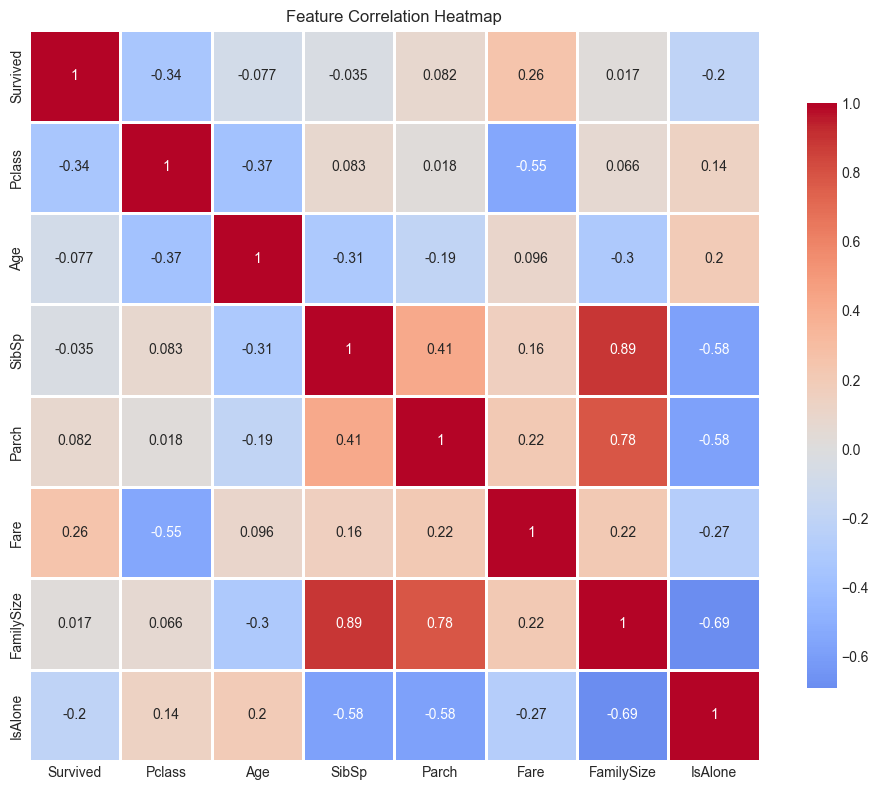

Correlation with Survival:
Survived      1.000000
Fare          0.257307
Parch         0.081629
FamilySize    0.016639
SibSp        -0.035322
Age          -0.077221
IsAlone      -0.203367
Pclass       -0.338481
Name: Survived, dtype: float64


In [163]:
# Cell 11: Correlation analysis
# Select numeric columns for correlation
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']
correlation_matrix = df[numeric_cols].corr()

# Create correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Print strong correlations with Survived
survived_corr = correlation_matrix['Survived'].sort_values(ascending=False)
print("Correlation with Survival:")
print(survived_corr)

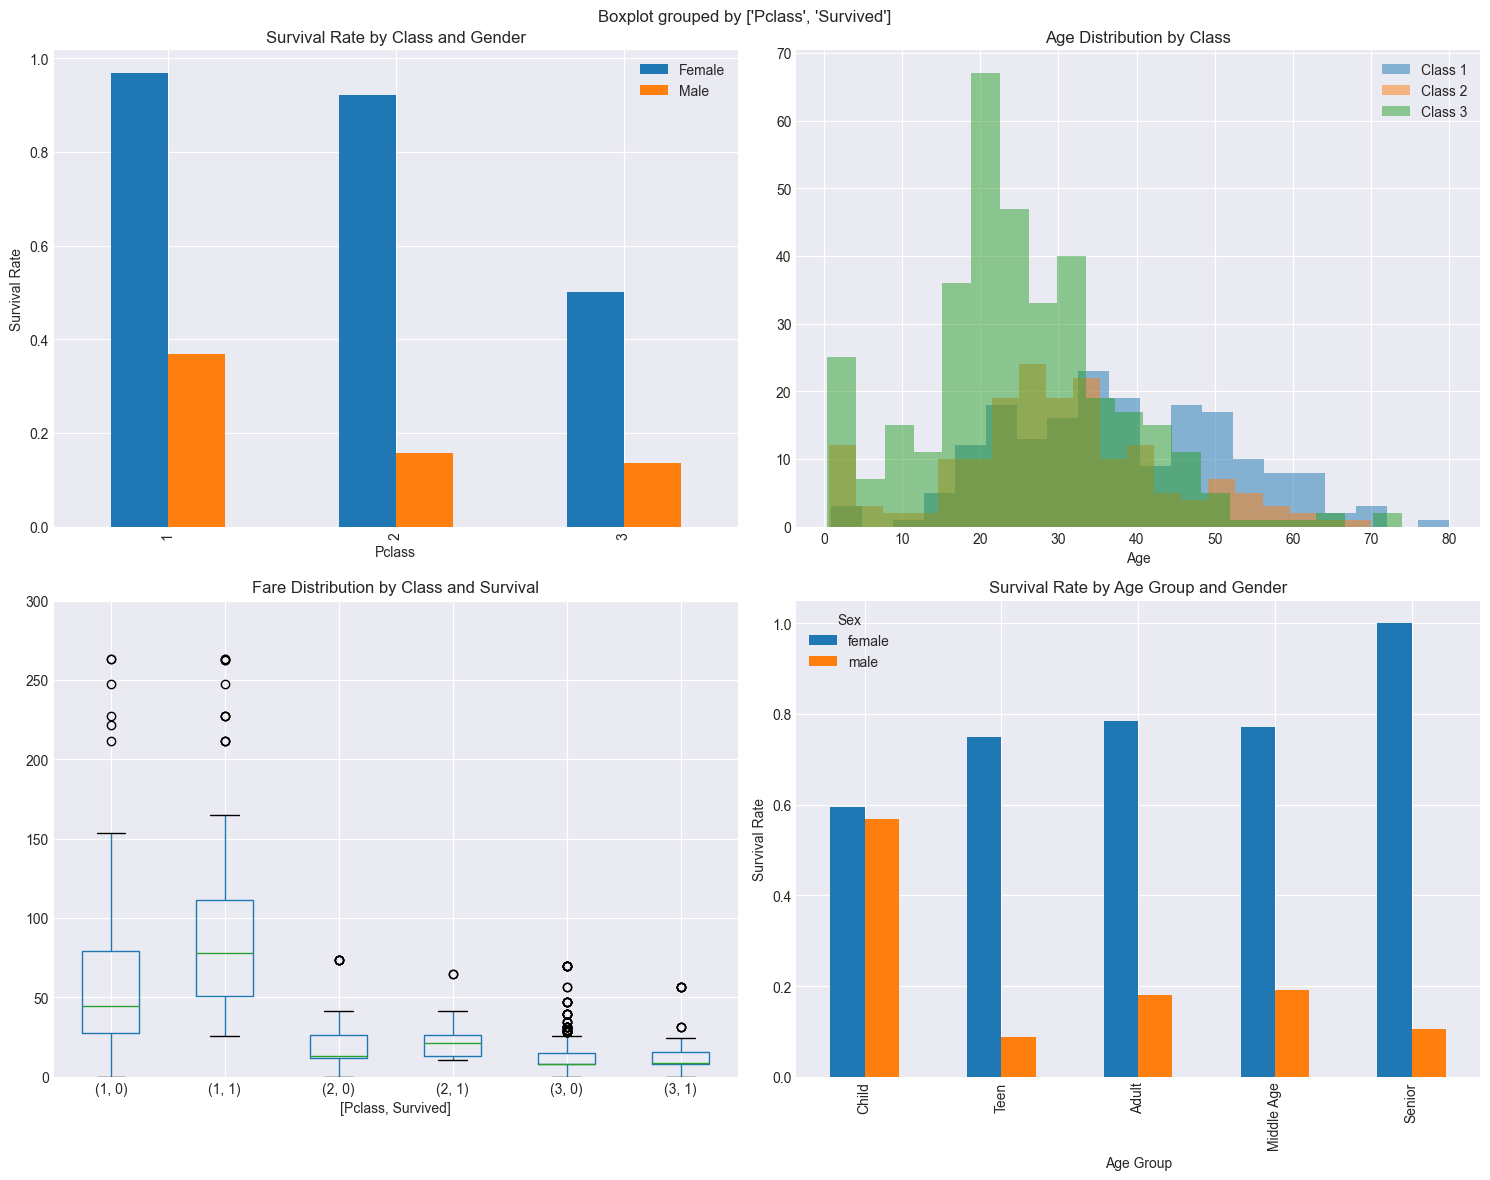

In [177]:
# Cell 12: Multivariate analysis
# Create a comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Survival by Class and Gender
survival_by_class_gender = df.groupby(['Pclass', 'Sex'])["Survived"].mean().unstack()
survival_by_class_gender.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Survival Rate by Class and Gender')
axes[0, 0].set_ylabel('Survival Rate')
axes[0, 0].legend(['Female', 'Male'])

# 2. Age distribution by Class
for pclass in sorted(df['Pclass'].unique()):
    df[df['Pclass'] == pclass]['Age'].hist(bins=20, alpha=0.5, 
                                           label=f'Class {pclass}', ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution by Class')
axes[0, 1].set_xlabel('Age')
axes[0, 1].legend()

# 3. Fare by Class and Survival
df.boxplot(column='Fare', by=['Pclass', 'Survived'], ax=axes[1, 0])
axes[1, 0].set_title('Fare Distribution by Class and Survival')
axes[1, 0].set_ylim(0, 300)

# 4. Survival by Age Groups and Gender
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                        labels=['Child', 'Teen', 'Adult', 'Middle Age', 'Senior'])
age_gender_survival = df.groupby(['AgeGroup', 'Sex'])['Survived'].mean().unstack()
age_gender_survival.plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Survival Rate by Age Group and Gender')
axes[1, 1].set_ylabel('Survival Rate')
axes[1, 1].set_xlabel('Age Group')

plt.tight_layout()
plt.show()

In [179]:
# Cell 13: Key findings summary
# Calculate key statistics
findings = {
    'Overall Survival Rate': f"{df['Survived'].mean():.2%}",
    'Female Survival Rate': f"{df[df['Sex'] == 'female']['Survived'].mean():.2%}",
    'Male Survival Rate': f"{df[df['Sex'] == 'male']['Survived'].mean():.2%}",
    'First Class Survival': f"{df[df['Pclass'] == 1]['Survived'].mean():.2%}",
    'Second Class Survival': f"{df[df['Pclass'] == 2]['Survived'].mean():.2%}",
    'Third Class Survival': f"{df[df['Pclass'] == 3]['Survived'].mean():.2%}",
    'Children (<12) Survival': f"{df[df['Age'] < 12]['Survived'].mean():.2%}",
    'Average Survivor Age': f"{df[df['Survived'] == 1]['Age'].mean():.1f} years",
    'Average Non-Survivor Age': f"{df[df['Survived'] == 0]['Age'].mean():.1f} years",
    'Average Survivor Fare': f"${df[df['Survived'] == 1]['Fare'].mean():.2f}",
    'Average Non-Survivor Fare': f"${df[df['Survived'] == 0]['Fare'].mean():.2f}"
}

print("="*50)
print("KEY FINDINGS FROM TITANIC DATA ANALYSIS")
print("="*50)

for key, value in findings.items():
    print(f"{key}: {value}")

print("\n" + "="*50)
print("MAIN INSIGHTS:")
print("="*50)
print("1. Gender had the strongest impact on survival - 'Women and children first' policy")
print("2. Passenger class significantly affected survival chances")
print("3. Higher fare (proxy for socioeconomic status) correlated with better survival")
print("4. Family size had a non-linear relationship with survival")
print("5. Age played a role, with children having better survival rates")

KEY FINDINGS FROM TITANIC DATA ANALYSIS
Overall Survival Rate: 38.38%
Female Survival Rate: 74.20%
Male Survival Rate: 18.89%
First Class Survival: 62.96%
Second Class Survival: 47.28%
Third Class Survival: 24.24%
Children (<12) Survival: 57.35%
Average Survivor Age: 28.3 years
Average Non-Survivor Age: 30.6 years
Average Survivor Fare: $48.40
Average Non-Survivor Fare: $22.12

MAIN INSIGHTS:
1. Gender had the strongest impact on survival - 'Women and children first' policy
2. Passenger class significantly affected survival chances
3. Higher fare (proxy for socioeconomic status) correlated with better survival
4. Family size had a non-linear relationship with survival
5. Age played a role, with children having better survival rates


In [185]:
# Cell 14: Save analysis results
# Create a summary report
summary_report = pd.DataFrame({
    'Metric': list(findings.keys()),
    'Value': list(findings.values())
})

# Save to CSV
summary_report.to_csv('data/analysis_summary.csv', index=False)
print("Analysis summary saved to data/analysis_summary.csv")

# Create feature importance based on correlation
feature_importance = pd.DataFrame({
    'Feature': survived_corr.index[1:],  # Exclude 'Survived' itself
    'Correlation': survived_corr.values[1:],
    'Absolute_Correlation': survived_corr.abs().values[1:]
}).sort_values('Absolute_Correlation', ascending=False)

print("\nFeature Importance (by correlation):")
print(feature_importance)

Analysis summary saved to data/analysis_summary.csv

Feature Importance (by correlation):
      Feature  Correlation  Absolute_Correlation
6      Pclass    -0.338481              0.338481
0        Fare     0.257307              0.257307
5     IsAlone    -0.203367              0.203367
1       Parch     0.081629              0.081629
4         Age    -0.077221              0.077221
3       SibSp    -0.035322              0.035322
2  FamilySize     0.016639              0.016639
